In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
countries_data = pd.read_csv('Country-data.csv')

In [3]:
countries_data.exports = countries_data.exports*countries_data.gdpp/100

In [4]:
countries_data.health = countries_data.health*countries_data.gdpp/100

In [5]:
countries_data.imports = countries_data.imports*countries_data.gdpp/100

In [6]:
countries_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<AxesSubplot:>

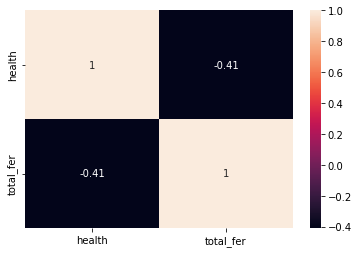

In [8]:
#sns.corr(countries_data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']])
sns.heatmap(countries_data[['health','total_fer']].corr(),annot=True)

# 2. Clean the data

In [9]:
round(100*(countries_data.isnull().sum())/len(countries_data), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

### Scaling the data

In [10]:
scaler = StandardScaler()

In [11]:
X = scaler.fit_transform(countries_data.loc[:,countries_data.columns != 'country'])

In [12]:
X

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

### PCA

In [13]:
pca = PCA()
pca_vars = pca.fit(X)

In [14]:
pca_vars.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [15]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [16]:
var_cumu

array([0.58937298, 0.77382467, 0.87293939, 0.93366217, 0.96395389,
       0.98855216, 0.9979496 , 0.99950602, 1.        ])

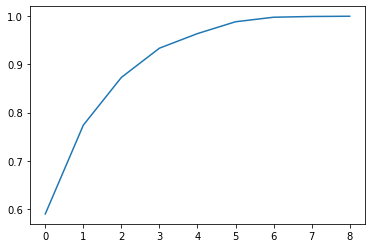

In [17]:
plt.plot(var_cumu)

In [18]:
pca = PCA(n_components=3,random_state=42)

In [19]:
cols = pca.fit_transform(X)

In [20]:
cdf = pd.DataFrame(cols,columns=["PC1","PC2","PC3"])

In [21]:
cdf_wc = pd.concat([countries_data.country,cdf],axis=1)

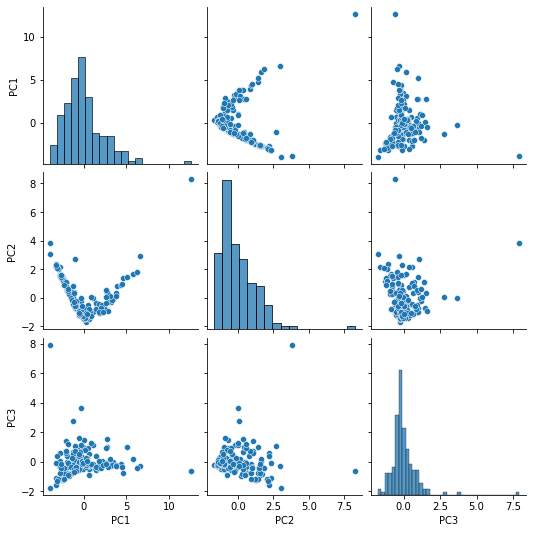

In [22]:
sns.pairplot(data=cdf_wc,x_vars=['PC1','PC2','PC3'],y_vars=['PC1','PC2','PC3'])

<AxesSubplot:>

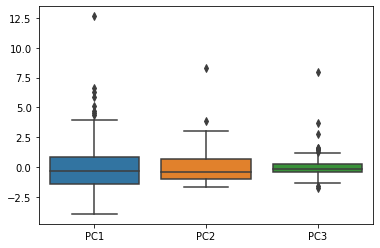

In [23]:
sns.boxplot(data=cdf)

In [24]:
cols= ['PC1','PC2','PC3']
Q3 = cdf_wc[cols].quantile(0.95)
cdf_wc = cdf_wc[~(cdf_wc[cols] > Q3).any(axis=1)]

In [25]:
cdf_wc

,country,PC1,PC2,PC3
0,Afghanistan,-2.635575,1.472267,-0.549489
1,Albania,-0.024206,-1.429892,-0.014123
2,Algeria,-0.459557,-0.675495,0.959355
4,Antigua and Barbuda,0.648597,-1.023437,-0.257430
6,Armenia,-0.334555,-1.271889,0.190564
...,...,...,...,...
160,Uruguay,0.454814,-1.098889,0.045829
161,Uzbekistan,-1.031922,-0.561378,0.763442
162,Vanuatu,-1.175210,-0.275652,-0.667131
164,Vietnam,-0.594449,-1.076335,0.528875


# 3.Hierarchial clustering

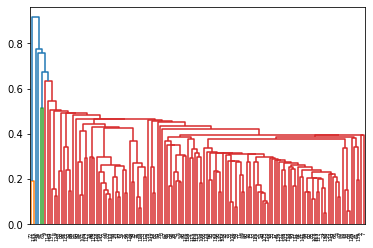

In [26]:
cdf = cdf_wc[['PC1','PC2','PC3']]
mergings = linkage(cdf, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

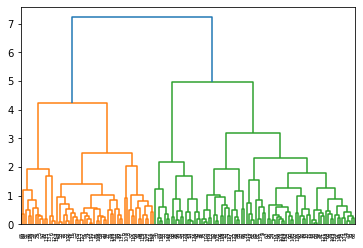

In [27]:
mergings = linkage(cdf, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

# 4. K-means

In [28]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(cdf)

KMeans(max_iter=50, n_clusters=4)

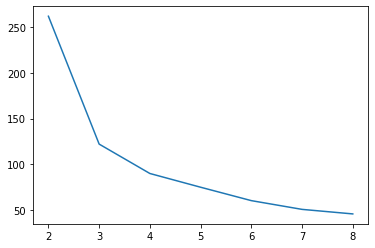

In [29]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cdf)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(range_n_clusters,ssd)

In [30]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cdf)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cdf, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.46052165669756473
For n_clusters=3, the silhouette score is 0.5205768566829136
For n_clusters=4, the silhouette score is 0.433310717627258
For n_clusters=5, the silhouette score is 0.3881542986126289
For n_clusters=6, the silhouette score is 0.36384243443579983
For n_clusters=7, the silhouette score is 0.38143189691502094
For n_clusters=8, the silhouette score is 0.3893405804066851


In [31]:
cdf['cluster_id'] = kmeans.labels_
cdf.head()

,PC1,PC2,PC3,cluster_id
0,-2.635575,1.472267,-0.549489,5
1,-0.024206,-1.429892,-0.014123,3
2,-0.459557,-0.675495,0.959355,0
4,0.648597,-1.023437,-0.257430,3
6,-0.334555,-1.271889,0.190564,0


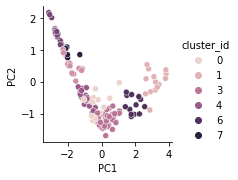

In [32]:
sns.pairplot(x_vars='PC1',y_vars='PC2',data=cdf,hue='cluster_id')
plt.show()

In [33]:
cdf[cdf['PC2']>1.8]

,PC1,PC2,PC3,cluster_id
37,-3.114930,2.170747,0.361477,5
97,-2.944260,2.010103,-1.142610,5
112,-3.060794,2.105242,-1.325128,5


In [34]:
countries_df = cdf_wc = pd.concat([countries_data,cdf.cluster_id],axis=1)

In [35]:
countries_df = countries_df.dropna()

In [36]:
countries_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,5.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,3.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,3.0
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,0.0
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,3129.70,993.6500,3022.600,17100,4.91,76.4,2.08,11900,3.0
161,Uzbekistan,36.3,437.46,80.1780,393.300,4240,16.50,68.8,2.34,1380,0.0
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,4.0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,0.0


<AxesSubplot:xlabel='cluster_id', ylabel='child_mort'>

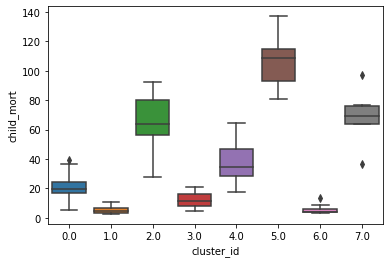

In [37]:
sns.boxplot(x='cluster_id', y='child_mort', data=countries_df)

<AxesSubplot:xlabel='cluster_id', ylabel='exports'>

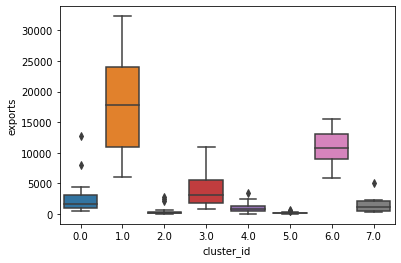

In [38]:
sns.boxplot(x='cluster_id', y='exports', data=countries_df)

<AxesSubplot:xlabel='cluster_id', ylabel='health'>

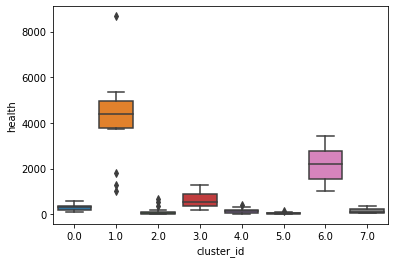

In [39]:
sns.boxplot(x='cluster_id', y='health', data=countries_df)

<AxesSubplot:xlabel='cluster_id', ylabel='imports'>

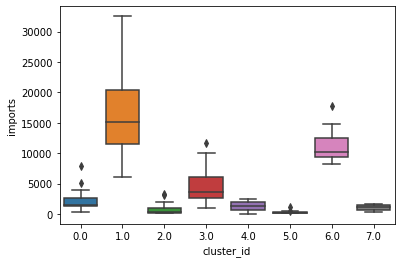

In [40]:
sns.boxplot(x='cluster_id', y='imports', data=countries_df)

<AxesSubplot:xlabel='cluster_id', ylabel='income'>

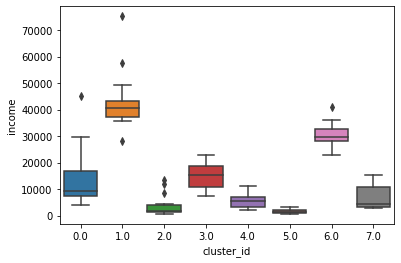

In [41]:
sns.boxplot(x='cluster_id', y='income', data=countries_df)

<AxesSubplot:xlabel='cluster_id', ylabel='inflation'>

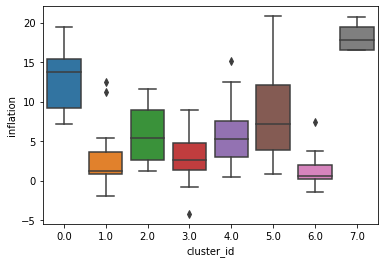

In [42]:
sns.boxplot(x='cluster_id', y='inflation', data=countries_df)

<AxesSubplot:xlabel='cluster_id', ylabel='life_expec'>

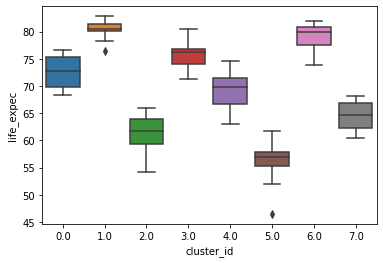

In [43]:
sns.boxplot(x='cluster_id', y='life_expec', data=countries_df)

<AxesSubplot:xlabel='cluster_id', ylabel='total_fer'>

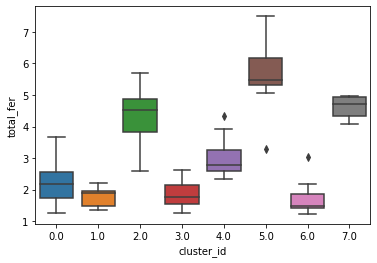

In [44]:
sns.boxplot(x='cluster_id', y='total_fer', data=countries_df)

<AxesSubplot:xlabel='cluster_id', ylabel='gdpp'>

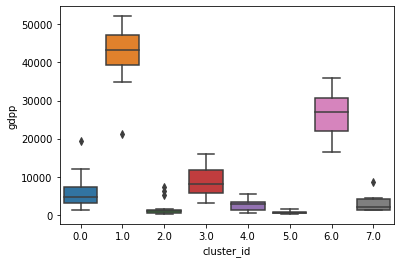

In [45]:
sns.boxplot(x='cluster_id', y='gdpp', data=countries_df)

In [46]:
countries_df[countries_df['cluster_id']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300,8.92,57.1,2.88,6350,2.0
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.87,65.9,4.75,769,2.0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,2.0
56,Gambia,80.3,133.7560,31.9778,239.974,1660,4.30,65.5,5.71,562,2.0
80,Kenya,62.2,200.1690,45.9325,324.912,2480,2.09,62.8,4.37,967,2.0
81,Kiribati,62.7,198.1700,168.3700,1190.510,1730,1.52,60.7,3.84,1490,2.0
84,Lao,78.9,403.5600,50.9580,562.020,3980,9.20,63.8,3.15,1140,2.0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2.0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,2.0
108,Namibia,56.0,2480.8200,351.8820,3150.330,8460,3.56,58.6,3.60,5190,2.0
